In [1]:

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as sig

os.chdir(os.path.dirname(os.getcwd()))
import spatial_metrics.helper_functions as hf
import spatial_metrics.cell_model_base as cs_model
import spatial_metrics.detect_peaks as dp
import spatial_metrics.spatial_metrics_spikes_base as pl_spk
import spatial_metrics.spatial_prediction_spikes_base as sp_spk


In [2]:
num_of_fields = 2
# Define field parameters
field1_center = (20, 35)
field2_center = (10, 5)
field3_center = (5, 30)
field1_size = 4
field2_size = 2
field3_size = 2

sampling_rate = 30. # points/frames per second
duration = 500 # in seconds
rate = 10 # how much your neuron should spike
environment_edges = [[0,30],[0,50]] # in cm [[x_min,x_max],[y_min,y_max]]

x_coordinates,y_coordinates,speed,time_vector = cs_model.generate_random_walk(input_srate = sampling_rate,input_total_Time = duration,heading_srate = 10., speed_srate = 5., rho1  = 1,sigma = 0.02,mu_e  = 0.,smooth_coeff = 0.5,environment_edges = environment_edges)
total_points = time_vector.shape[0]

spike_times = cs_model.generate_poisson_spikes(rate, duration)
spike_times_idx = (spike_times*sampling_rate).astype(int)

modulated_spike_times_idx = []
for counter in range(num_of_fields):
    field_center = eval('field' + str(counter+1) + '_center')
    field_size = eval('field' + str(counter+1) + '_size')
    modulated_spike_times_idx_aux = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,spike_times_idx,x_center = field_center[0],y_center = field_center[1], s = field_size)

    modulated_spike_times_idx.append(modulated_spike_times_idx_aux)
modulated_spike_times_idx = np.unique(np.concatenate(modulated_spike_times_idx))




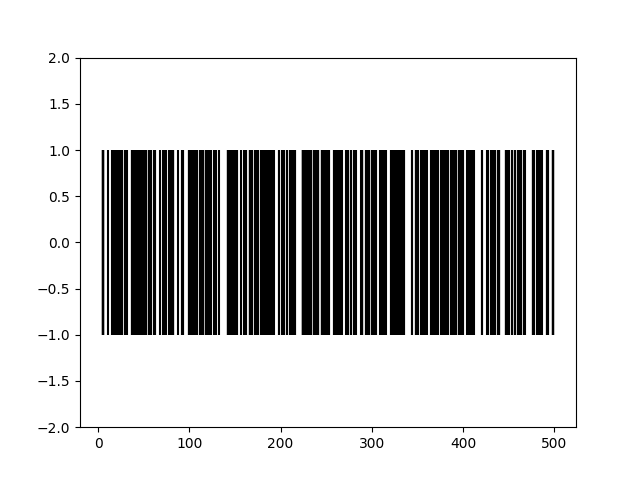

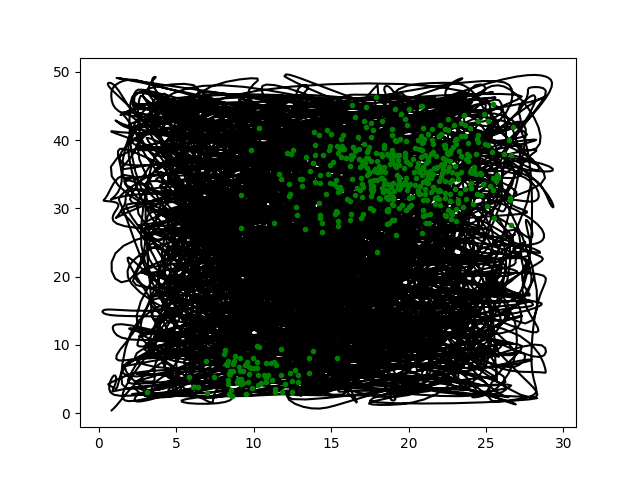

In [3]:

plt.figure()
plt.eventplot(time_vector[modulated_spike_times_idx],color='black',lineoffsets=0,linelengths=2)
plt.ylim([-2,2])
plt.show()


plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[modulated_spike_times_idx],y_coordinates[modulated_spike_times_idx],'g.')
plt.show()


In [4]:

'''
- Parameters to assist in creating a filename and saving it. However, if you prefer 
to save the object itself, you can safely ignore this by setting the 'saving' flag to False.

- Filename Constructor:
    'saving_string': Prefix string used for creating a filename to save the results.
    'animal_id': Animal identifier.
    'dataset': Dataset name.
    'day': Session or day.
    'neuron': Neuron identifier.
    'trial': Trial identifier.
    'saving_path': Path for saving the results.
    'saving': A boolean flag indicating whether to save the results.

- Parameters:
    'sampling_rate': Sampling rate for the signal and tracking.
    'environment_edges': Edges of the environment using coordinates units.

- Inclusion Criteria:
    'min_time_spent': Minimum time an animal must spend in each xy bin.
    'min_visits': Minimum number of visits required in each xy bin.
    'min_speed_threshold': Minimum speed threshold using coordinates units.

- Information Parameters:
    'x_bin_size': Size of x bins, measured in coordinates units, used to calculate mutual information.
    'y_bin_size': Size of y bins, measured in coordinates units, used to calculate mutual information.
    
- Surrogate Parameters:
    'shift_time': Time shift window in seconds. It is used to create a surrogate distribution of the 
        signal by randomly shifting it from -shift_time to +shift_time.
    'num_cores': The number of CPU cores to be used. Set to -1 to utilize all available CPU cores.
    'num_surrogates': Number of surrogates.

- Place Field Parameters:
    'smoothing_size': Smoothing area in bins to plot place fields.
    'percentile_threshold': Percentile threshold used to calculate place field boundaries based on the surrogate distribution.
    'min_num_of_pixels': Minimum number of bins that define a place field.

This analysis assumes that all input variables (input_signal, time_vector, x_coordinates, y_coordinates)
consist of vectors of the same size. You may need to downsample or upsample your signal or xy tracking 
coordinates to ensure their shapes match.

'''

"\n- Parameters to assist in creating a filename and saving it. However, if you prefer \nto save the object itself, you can safely ignore this by setting the 'saving' flag to False.\n\n- Filename Constructor:\n    'saving_string': Prefix string used for creating a filename to save the results.\n    'animal_id': Animal identifier.\n    'dataset': Dataset name.\n    'day': Session or day.\n    'neuron': Neuron identifier.\n    'trial': Trial identifier.\n    'saving_path': Path for saving the results.\n    'saving': A boolean flag indicating whether to save the results.\n\n- Parameters:\n    'sampling_rate': Sampling rate for the signal and tracking.\n    'environment_edges': Edges of the environment using coordinates units.\n\n- Inclusion Criteria:\n    'min_time_spent': Minimum time an animal must spend in each xy bin.\n    'min_visits': Minimum number of visits required in each xy bin.\n    'min_speed_threshold': Minimum speed threshold using coordinates units.\n\n- Information Parame

In [19]:
# video sampling rate (it can be an approximation of the coordinates timestamps for cameras with varying frame rates)
# sampling_rate = 1/np.nanmean(np.diff(time_vector))

signal_type = 'Spikes'

input_dict = dict()
# filename constructor
input_dict['saving_string'] = 'SpatialMetrics.' + signal_type
input_dict['animal_id'] = 'NeuronModel'
input_dict['dataset'] = 'Simulation'
input_dict['day'] = 1
input_dict['neuron'] = 1
input_dict['trial'] = None
input_dict['saving_path'] = None
input_dict['saving'] = False
 
input_dict['sampling_rate'] = sampling_rate # in points per second
input_dict['environment_edges'] = environment_edges # in cm

# inclusion criteria
input_dict['min_time_spent'] = 0
input_dict['min_visits'] = 0
input_dict['min_speed_threshold'] = 0 

# information parameters
input_dict['x_bin_size'] = 1 # x bin size in cm
input_dict['y_bin_size'] = 1 # y bin size in cm

# surrogate parameters
input_dict['shift_time'] = 200
input_dict['num_cores'] = -1
input_dict['num_surrogates'] = 80

# place field parameters
input_dict['smoothing_size'] = 2
input_dict['percentile_threshold'] = 99
input_dict['min_num_of_pixels'] = 4

place_cell = pl_spk.PlaceCell(**input_dict)
place_cell_output = place_cell.main(modulated_spike_times_idx,time_vector,x_coordinates,y_coordinates)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s


File not saved


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.6s finished


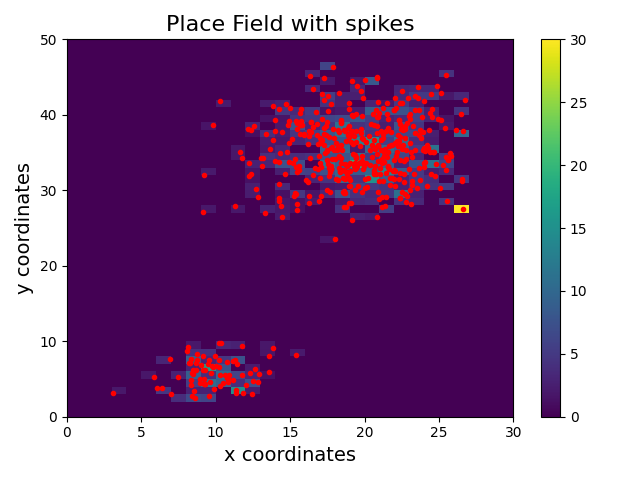

In [20]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field'],shading = 'auto',edgecolors=None)
# plt.pcolormesh(place_cell_output['x_grid'],place_cell_output['y_grid'],place_cell_output['place_field'],edgecolors='red')

plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6)
plt.colorbar()
plt.title('Place Field with spikes',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



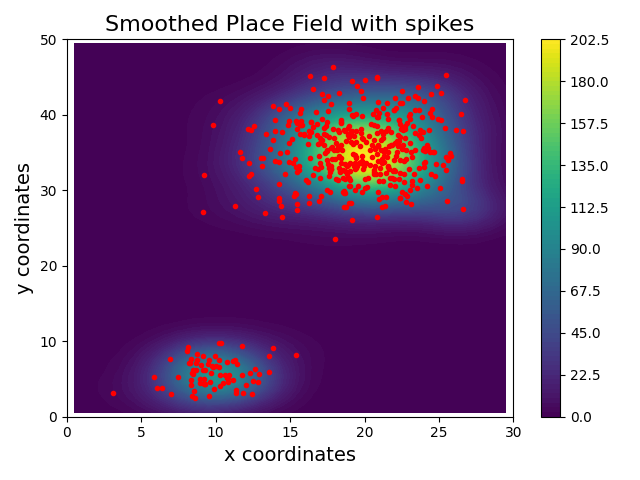

In [21]:


plt.figure()
plt.contourf(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'],100,cmap='viridis')
plt.plot(place_cell_output['x_peaks_location'],place_cell_output['y_peaks_location'],color = 'red',linestyle='',marker='.',markersize=6)
plt.colorbar()
plt.title('Smoothed Place Field with spikes',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.gca().set_aspect('equal')
plt.tight_layout()

plt.show()



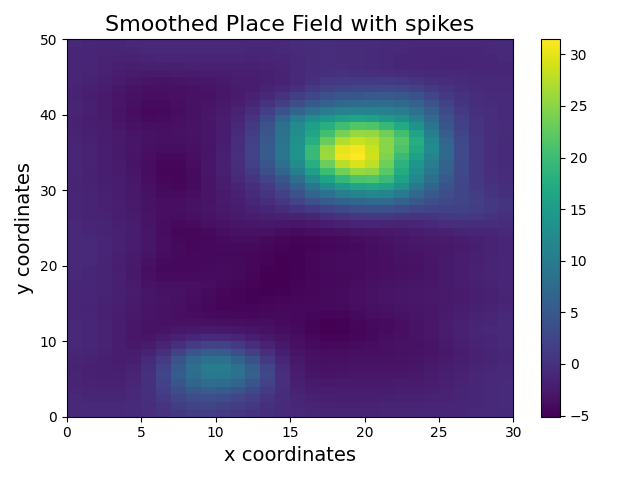

In [22]:

mean_place_field_shuffled = np.nanmean(place_cell_output['place_field_smoothed_shifted'],0)
std_place_field_shuffled = np.nanstd(place_cell_output['place_field_smoothed_shifted'],0)
place_field_smoothed = place_cell_output['place_field_smoothed'].copy()
place_field_smoothed_zscored = (place_field_smoothed - mean_place_field_shuffled)/std_place_field_shuffled


plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_field_smoothed_zscored)
plt.colorbar()
plt.title('Smoothed Place Field with spikes',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()




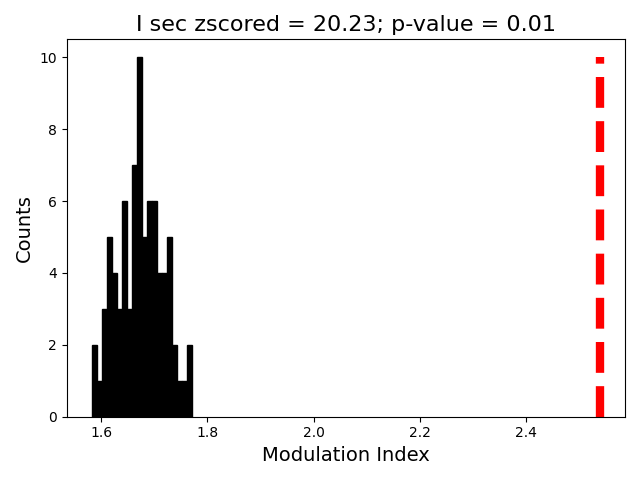

In [31]:
p_value = hf.calculate_p_value(place_cell_output['I_sec_original'], place_cell_output['I_sec_shifted'] )


counts,bins = np.histogram(place_cell_output['I_sec_shifted'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([place_cell_output['I_sec_original'],place_cell_output['I_sec_original']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("I sec zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_sec_zscored'],p_value),fontsize=16)
plt.xlabel('Modulation Index',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()


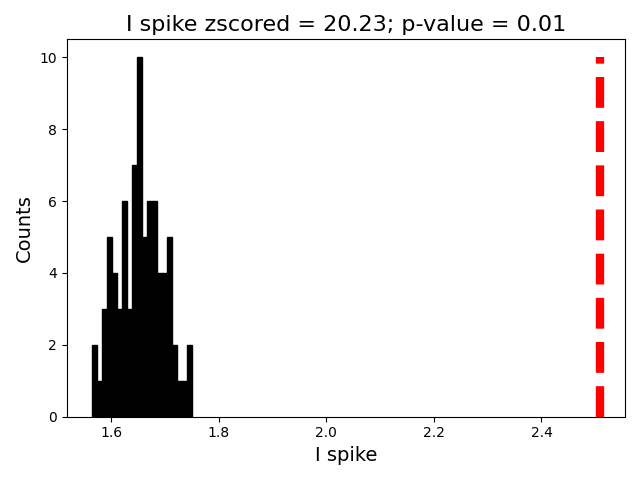

In [32]:
# p value is defined as the amount of shuffled mutual information values above the original one 
p_value = hf.calculate_p_value(place_cell_output['I_spk_original'], place_cell_output['I_spk_shifted'] )

counts,bins = np.histogram(place_cell_output['I_spk_shifted'],20)
bins_centers = bins[0:-1] + np.diff(bins)
bin_width = np.diff(bins_centers)[0]

plt.figure()
plt.bar(bins_centers,counts,color='black',width=bin_width,linewidth=1,edgecolor='black')
plt.plot([place_cell_output['I_spk_original'],place_cell_output['I_spk_original']],[0,np.max(counts)],'r--',linewidth=6)
plt.title("I spike zscored = {0:.2f}; p-value = {1:.2f}".format(place_cell_output['I_spk_zscored'],p_value),fontsize=16)
plt.xlabel('I spike',fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipykernel_30338/1667896982.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


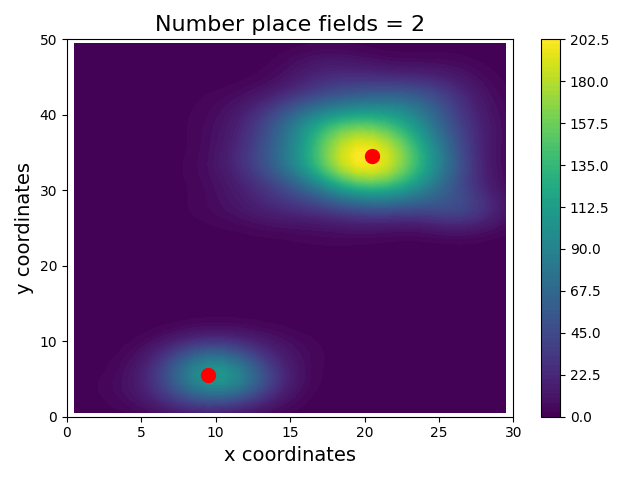

In [33]:
# place field identity and location

plt.figure()
plt.contourf(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_smoothed'],100)
plt.colorbar()
plt.plot(place_cell_output['x_center_bins'][place_cell_output['islands_x_max']],place_cell_output['y_center_bins'][place_cell_output['islands_y_max']],color='red',linestyle='',marker='.',markersize=20)
plt.title('Number place fields = {0}'.format(place_cell_output['num_of_islands']) ,fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


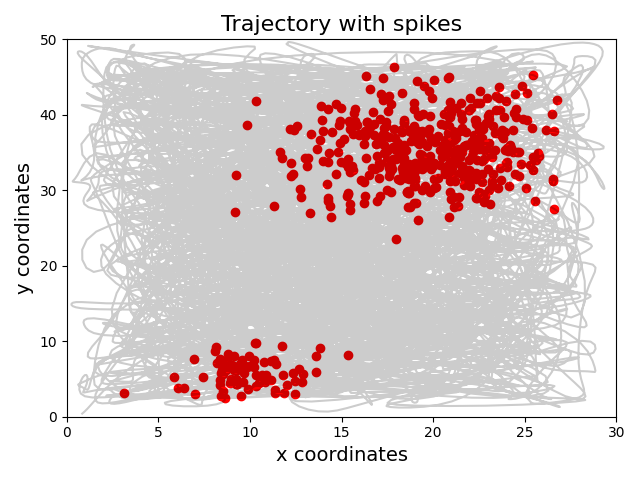

In [34]:

x_peaks_location = place_cell_output['x_peaks_location']
y_peaks_location = place_cell_output['y_peaks_location']

plt.figure()
plt.plot(x_coordinates,y_coordinates,'k',alpha=0.2)
plt.scatter(x_peaks_location,y_peaks_location,color='red')
plt.title('Trajectory with spikes',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


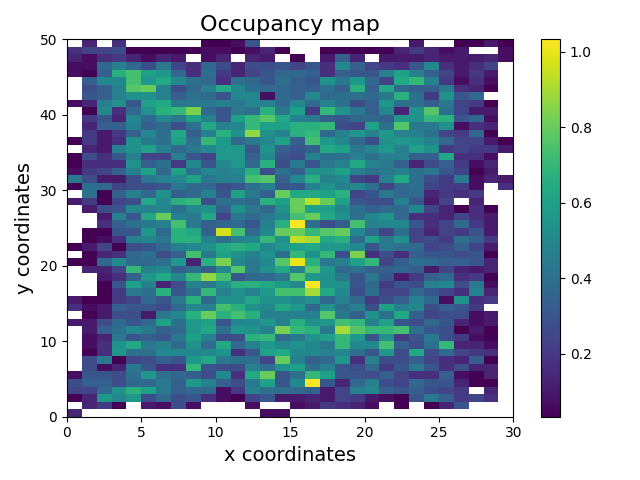

In [35]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['occupancy_map'])
plt.colorbar()
plt.title('Occupancy map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


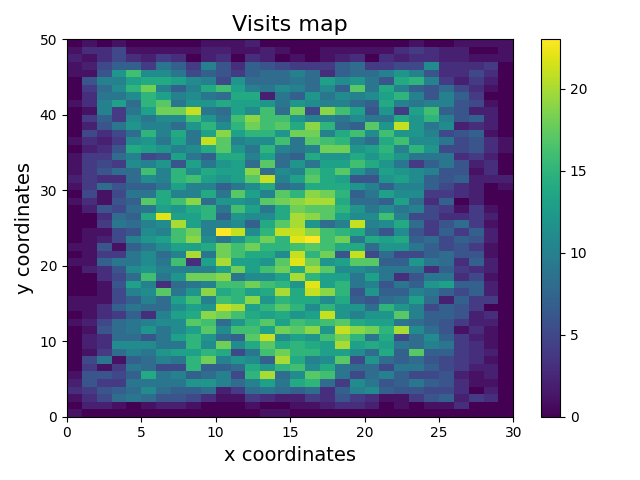

In [36]:

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['visits_map'])
plt.colorbar()
plt.title('Visits map',fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()


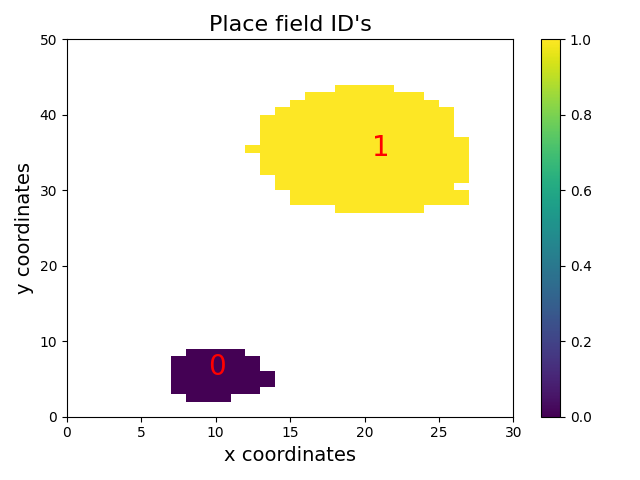

In [37]:
place_cells_x_center_coord = place_cell_output['x_center_bins'][place_cell_output['islands_x_max']]
place_cells_y_center_coord = place_cell_output['y_center_bins'][place_cell_output['islands_y_max']]

plt.figure()
plt.pcolormesh(place_cell_output['x_center_bins'],place_cell_output['y_center_bins'],place_cell_output['place_field_identity'])
plt.colorbar()


for counter,(x, y) in enumerate(zip(place_cells_x_center_coord, place_cells_y_center_coord)):
    plt.text(x, y, str(counter), color='red',fontsize=20)

plt.title("Place field ID's",fontsize=16)
plt.xlabel('x coordinates',fontsize=14)
plt.ylabel('y coordinates',fontsize=14)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
plt.tight_layout()
plt.show()



In [16]:
# Place fields id's listed in place_cell_output['place_field_identity'] 
# can be used as indexes for place_cell_extension_absolute and place_cell_extension_relative

In [38]:
# Place field extension relative to the whole enviroment
place_cell_output['place_cell_extension_absolute']


array([0.026     , 0.13266667])

In [39]:
# Place field extension relative to enviroment occupancy
place_cell_output['place_cell_extension_relative']


array([0.02880355, 0.14697194])